# Crash Course in Causality - Customer Segmentation: Estimate Individualized Responses to Incentives

# Understanding causal analysis
Causal analysis aims to uncover true causes and effects from data. You might have heard the phrase “correlation does NOT imply causation.” This means that correlation alone does not tell us what actions to take to achieve a desired outcome. In many scenarios, correlation could be a combination of causation as well as confounding association. For example, suppose we observe that people who carry lighters are more likely to develop lung cancer. Does carrying a lighter cause lung cancer? No, it simply turns out that smoking is the confounding factor that leads to both carrying lighters and developing lung cancer.

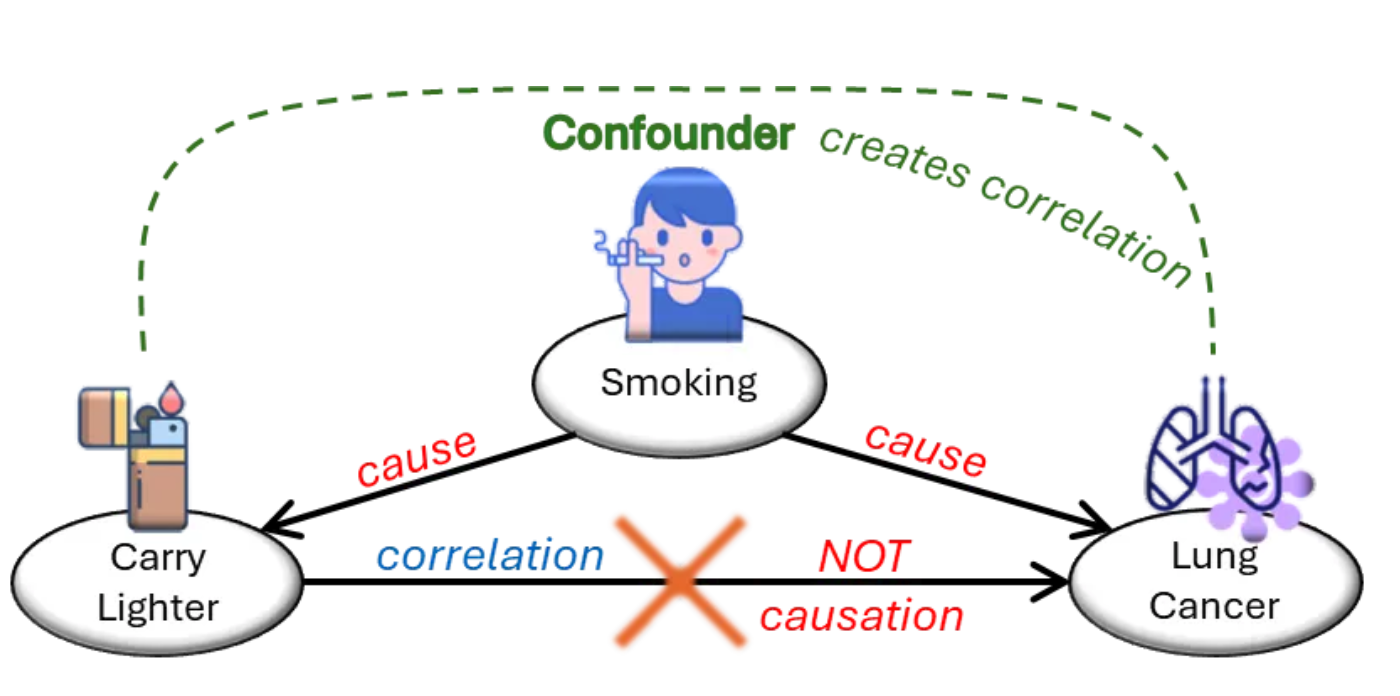

In this example, “smoking” is a confounder (common cause) for carrying lighters as well as developing lung cancer.

Causal analysis has a wide range of applications across various industries.

Here are some diverse examples:

- Healthcare: Determining which treatments improve patient outcomes.
- Economics: Assessing the effects of economic policies on employment.
- Education: Evaluating the effects of learning tools on performance.
- Marketing: Measuring the impact of marketing campaigns on sales.
- Environmental policy: Assessing the impact of pollution control measures on air quality.

## Abstract
This notebook explores the critical intersection of causality and machine learning for business decision-making. We focus on how proper data preparation and causal inference techniques enable us to estimate individualized responses to interventions, such as price discounts. Rather than applying a one-size-fits-all approach, we demonstrate how to identify heterogeneous treatment effects across different customer segments, allowing businesses to optimize their strategies for maximum impact. By leveraging causal inference libraries like DoWhy and EconML, we show how to build robust causal models, test their assumptions, and translate insights into actionable policies. This approach helps businesses use the least resources to achieve the greatest profit by understanding which customers respond most strongly to specific interventions.

## Introduction to Causality in Business Decision-Making
Imagine you’re a business decision-maker asking “What if...?” questions: What if we offer a discount to certain customers? What if we add a new feature to the product? Traditional analytics can find correlations, but making optimal decisions requires understanding cause-and-effect relationships. Causal inference techniques help answer these questions by estimating the effect of an action (like a discount) on an outcome (like sales), isolating cause from mere correlation.

In business, causal questions are everywhere. For example, if a marketing campaign increases sales, we want to be sure it caused the increase – not just that sales went up coincidentally. Causal inference provides the tools to make that determination, which is crucial for effective decision-making.

## The Challenge of Heterogeneous Treatment Effects
A major challenge in causal inference is that not everyone responds the same way to an intervention. Basic analyses often focus on the Average Treatment Effect (ATE) – the average impact of a treatment on the population. But in reality, individuals can respond very differently. One customer might jump at a 10% discount, another might not care at all. This variability is known as heterogeneous treatment effects. Identifying and leveraging these differences is key to personalization and targeted strategies. Instead of treating all customers as identical, we aim to find which segments of customers respond most (or least) to a given action, and by how much.

## Key Concepts in Causal Inference

### Potential Outcomes Framework

The foundation of modern causal inference is the potential outcomes framework, where:
- $$Y_i(1)$$ represents the outcome for individual i if they receive the treatment
- $$Y_i(0)$$ represents the outcome for the same individual if they don't receive treatment
- The individual treatment effect is $$Y_i(1) - Y_i(0)$$

The fundamental problem of causal inference is that we can only observe one of these potential outcomes for each individual.

### Causal Graphs and Assumptions

We often use causal graphs (Directed Acyclic Graphs, DAGs) to visualize our assumptions about cause and effect. In a causal graph, we have:

- Treatment (T): the variable we manipulate (e.g. offering a price discount).
- Outcome (Y): the result we care about measuring (e.g. the customer’s purchase or demand).
- Confounders (W): variables that affect both T and Y (e.g. a customer’s browsing time might influence both whether they see a discount and whether they purchase). We need to account for these so they don’t bias our analysis.
- Effect Modifiers (X): variables that modify how T affects Y (they cause heterogeneity in treatment effect). For example, income level might change how sensitive someone is to a price change.

A causal graph helps identify what we should control for. For instance, with the backdoor criterion we select confounders W such that, if we adjust for W, any path from treatment to outcome (that isn’t a direct causal path) is blocked. This ensures we isolate the true effect of T on Y.



### Conditional Average Treatment Effects (CATE)

CATE represents how treatment effects vary based on individual characteristics:

$$ CATE(x) = E[Y(1) - Y(0) | X = x] $$

This allows us to estimate personalized treatment effects for different segments.

### Data Preparation for Causal Analysis

Proper data preparation is critical for valid causal inference:

1. **Identifying Variable Roles**:Clearly specify which variables in our dataset play which roles:

    - Outcome (Y): The metric we want to change (e.g. purchase quantity).
    - Treatment (T): The intervention or factor we manipulate (e.g. price or discount).
    - Heterogeneity features (X): Features that might cause different responses to T (e.g. income level).
    - Confounders (W): Features that affect both T and Y (e.g. prior purchase behavior could influence who gets a discount and also affect future purchases).

2. **Handling Missing Data**: Missing values can bias causal estimates. We should consider techniques like imputation if data are missing, to avoid inadvertently altering relationships. For example, using multiple imputation can preserve the correlations needed for causal analysis.

3. **Feature Engineering**: We may create or transform features to better capture relationships or satisfy model assumptions. For instance, using logarithms for skewed variables (like income or spend) or creating interaction terms if we suspect non-linear effects.

4. **Addressing Selection Bias**: We must consider how the data were collected or how treatment was assigned. If the way data are gathered or the way the treatment is doled out is biased, we need to account for it. This might involve re-weighting data or using techniques like matching. Essentially, we want to ensure treated and untreated groups are comparable except for the treatment.

### Approaches to Estimating Heterogeneous Treatment Effects

Several modern methods exist for estimating heterogeneous treatment effects:

1. **Meta-learners**:
   - S-learner: Single model that includes treatment as a feature
   - T-learner: Separate models for treated and control groups
   - X-learner: Combines predictions from both treatment and control models

2. **Double/Debiased Machine Learning (DML)**:
   - Uses sample splitting and orthogonalization to reduce bias
   - Works well with high-dimensional data

3. **Causal Forests**:
   - Extension of random forests for causal inference
   - Adaptively estimates treatment effects across subgroups

### Evaluating and Validating Causal Models

Unlike standard predictive models, we can’t directly “check the accuracy” of a causal model by comparing to a ground truth (since the counterfactual outcome is unobserved for each person). So we validate causal models with other techniques:

1. **Sensitivity Analysis**: We test how robust our conclusions are if our assumptions are violated. For instance, how much unmeasured confounding would be required to overturn our result? If a slight hidden bias could change things, our results are fragile; if even a strong hidden confounder wouldn’t alter our effect much, we’re more confident.
2. **Placebo Tests**: We try a fake intervention that should have no effect. For example, randomly assign “placebo” treatments or use a variable that shouldn’t causally affect the outcome. If our method finds an effect where there should be none, that’s a red flag – it might be picking up spurious correlations.
3. **Subgroup Consistency**: Check the effect in different subsets of data. If we estimate the treatment effect on two independent subsets of our data, do we get similar results? Consistency across subsets increases confidence that the effect is real and generalizable.
4. **Random Common Cause Tests**: Introduce a random “fake confounder” into the analysis. Since it’s pure noise, it shouldn’t change our effect estimate. If adding a random variable as an extra confounder does change the estimated effect a lot, something might be wrong (perhaps overfitting or a coincidence in the data).

## Practical Code Example

That covers the core concepts. Next, let’s apply these ideas to a real-world scenario. We’ll walk through a case study involving a media company trying to optimize a pricing strategy using causal inference. Our goal: understand price elasticity of demand for different customer segments and decide who should receive a discount. We’ll use the EconML and DoWhy libraries to do the heavy lifting for causal estimation and validation.

Scenario: A global online media company sells songs and subscriptions. They run an experiment offering some users a small discount (10% or 20% off, or no discount) based on each user’s income level, hoping to increase purchases. We want to learn how sensitive different users are to price changes – for example, do low-income users buy significantly more when given a discount, while high-income users barely respond? Ultimately, the company wants to boost overall revenue: any loss from lowering prices should be offset by a big enough jump in sales volume. By identifying who is most responsive to the discount, the company can target discounts to those users only, maximizing revenue gain.

We’ll see how DoWhy helps us build a causal model of this scenario (making our assumptions explicit and identifying the effect we need to estimate), and how EconML estimates the magnitude of the effect for different segments and even helps suggest an optimal policy.

(For reference, we assume a baseline price normalized to 1.0, and “small discount” means charging 0.9 or 0.8 instead of 1.0, i.e., 10% or 20% off.)

### Summary

1. [Background](#background)
2. [Data](#data)
3. [Create Causal Model and Identify Causal Effect with DoWhy](#identify)
4. [Get Causal Effects with EconML](#estimate)
5. [Test Estimate Robustness with DoWhy](#robustness)
    1. [Add Random Common Cause](#random-common-cause)
    2. [Add Unobserved Common Cause](#unobserved-common-cause)
    3. [Replace Treatment with a Random (Placebo) Variable](#placebo-variable)
    4. [Remove a Random Subset of the Data](#subset)
6. [Understand Treatment Effects with EconML](#interpret)
7. [Make Policy Decisions with EconML](#policy)
8. [Conclusions](#conclusion)

# Background <a id="background"></a>

<img src="https://cdn.pixabay.com/photo/2018/08/16/11/59/radio-3610287_960_720.png" width="400" />

The online media market has been growing rapidly. Media companies constantly seek ways to attract users and increase sales of songs or subscriptions. One common strategy is pricing incentives. In our scenario, the company ran an experiment: it offered a small discount (0%, 10%, or 20% off the normal price) to various users, with the discount level loosely based on each user’s income bracket. The causal question is: How does the discount affect purchase behavior, and does this effect differ by income level? In other words, what is the price elasticity of demand for different income segments?

If lower-income users are much more sensitive to price (meaning a little discount makes them buy a lot more), the company would want to give them discounts. If higher-income users would have bought nearly the same amount even without a discount, the company shouldn’t waste a discount on them. The ultimate goal is to ensure that even though we’re cutting the price for some customers, the increase in demand is enough to boost overall revenue.

To solve this, we’ll use the EconML and DoWhy libraries together. DoWhy will help us formally frame the causal question (e.g., set up the relationships and assumptions in a causal graph, then identify the effect of price on demand we need to estimate). EconML will help estimate that effect, especially focusing on how it varies with income. By combining them, we get a robust solution: DoWhy ensures we are measuring the right thing in a principled way, and EconML provides state-of-the-art estimation techniques for heterogeneous effects.

In [14]:
# Some imports to get us started

# Utilities
import numpy as np
import pandas as pd
from networkx.drawing.nx_pydot import to_pydot
from IPython.display import Image, display

# Generic ML imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor

# EconML imports
from econml.dml import LinearDML, CausalForestDML
from econml.cate_interpreter import SingleTreeCateInterpreter, SingleTreePolicyInterpreter

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

# Data <a id="data"></a>


Let’s start by looking at the data available for this problem. The dataset has about 10,000 observations (users) with a variety of features describing each user’s characteristics and past behavior. These include both **continuous and categorical variables**. Below is a description of each feature and what role we consider it in our causal analysis (using the notation from earlier: W for confounders, X for effect modifiers, T for treatment, Y for outcome):

Feature Name|Type|Details 
:--- |:---|:--- 
**account_age** |W| user's account age
**age** |W|user's age
**avg_hours** |W| the average hours user was online per week in the past
**days_visited** |W| the average number of days user visited the website per week in the past
**friend_count** |W| number of friends user connected in the account 
**has_membership** |W| whether the user had membership
**is_US** |W| whether the user accesses the website from the US 
**songs_purchased** |W| the average songs user purchased per week in the past
**income** |X| user's income
**price** |T| the price user was exposed during the discount season (baseline price * small discount)
**demand** |Y| songs user purchased during the discount season

In summary, **the treatment is the price/discount given**, and **the outcome is how many songs were bought** in that period. We have a rich set of W features (previous behavior, demographics, etc.) that could affect both price assignment and purchasing – for example, perhaps users with more past usage or lower income were more likely to be targeted for discounts, and those factors also influence how much they buy. That’s why we include them as confounders W to adjust for those differences. The `income` feature we label as X (effect modifier) – we want to see if income changes the effect of price on demand.

Now, let’s load the data and take a quick look at it: 

In [16]:
# Import the sample pricing data
file_url = "https://econmldata.azurewebsites.net/datasets/Pricing/pricing_sample.csv"
train_data = pd.read_csv(file_url)

In [17]:
# Data sample
train_data.head()

,account_age,age,avg_hours,days_visited,friends_count,has_membership,is_US,songs_purchased,income,price,demand
0,3,53,1.834234,2,8,1,1,4.903237,0.960863,1.0,3.917117
1,5,54,7.171411,7,9,0,1,3.330161,0.732487,1.0,11.585706
2,3,33,5.351920,6,9,0,1,3.036203,1.130937,1.0,24.675960
3,2,34,6.723551,0,8,0,1,7.911926,0.929197,1.0,6.361776
4,4,30,2.448247,5,8,1,0,7.148967,0.533527,0.8,12.624123


Causal inference is about estimating the effect of an intervention or treatment (e.g., price discount) on an outcome (e.g., product demand). Unlike correlation, causal inference seeks to answer: _"What would have happened if we did or did not apply the treatment?"_

Key concepts:
- **Treatment (`T`)**: The action (e.g., giving a discount)
- **Outcome (`Y`)**: The result (e.g., demand)
- **Confounders (`W`)**: Variables that affect both `T` and `Y`
- **Effect Modifier (`X`)**: Feature(s) that affect how treatment impacts outcome
- **CATE / ATE**: Conditional / Average Treatment Effect

Before proceeding to modeling, one common preprocessing step is transforming skewed variables. The outcome demand is count-like and can be skewed, and price is between 0.8–1.0. A trick we use is log-transforming them, which can stabilize variance and linearize relationships. We’ll create log_demand and log_price columns for our analysis:

In [19]:
# Define estimator inputs
train_data["log_demand"] = np.log(train_data["demand"])
train_data["log_price"] = np.log(train_data["price"])

Y = train_data["log_demand"].values
T = train_data["log_price"].values
X = train_data[["income"]].values  # features
confounder_names = ["account_age", "age", "avg_hours", "days_visited", "friends_count", "has_membership",
                    "is_US", "songs_purchased"]
W = train_data[confounder_names].values

In the above preparation step:
1. We apply log transformations to both demand and price, which is common in economic analyses to model percentage changes and elasticities
2. We separate variables into their causal roles: Y (outcome), T (treatment), X (heterogeneity variables), and W (confounders)
3. We prepare a test dataset with varying income levels to examine how treatment effects change across this dimension

In [21]:
# Get test data
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
X_test_data = pd.DataFrame(X_test, columns=["income"])

Simulate different income levels from 0 to 5

Evaluate how the treatment effect (CATE) varies with income

# Create Causal Model and Identify Causal Effect

We define the causal assumptions with DoWhy. For example, we can include features we believe as confounders and features we think will influence the heterogeneity of the effect. With these assumptions defined, DoWhy can generate a causal graph for us, and use that graph to first identify the causal effect.



A causal graph (DAG) visually represents the assumptions about how variables interact. DoWhy uses this to identify the estimand — the expression that defines what causal effect we're estimating.

We use the **backdoor criterion** to identify confounders we must adjust for.

In [24]:
# initiate an EconML cate estimator
est = LinearDML(model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor(),
              featurizer=PolynomialFeatures(degree=2, include_bias=False))

In [25]:
# fit through dowhy
est_dw = est.dowhy.fit(Y, T, X=X, W=W,
                       outcome_names=["log_demand"], treatment_names=["log_price"], feature_names=["income"],
                       confounder_names=confounder_names, inference="statsmodels")

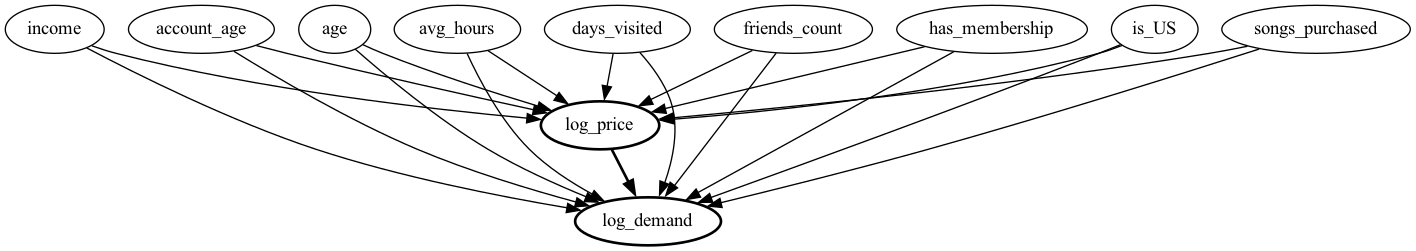

In [26]:
# Visualize causal graph
try:
    # Try pretty printing the graph. Requires pydot and pygraphviz
    display(
        Image(to_pydot(est_dw._graph._graph).create_png())
    )
except Exception:
    # Fall back on default graph view
    est_dw.view_model(layout=None)

In [27]:
identified_estimand = est_dw.identified_estimand_
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                         ↪
────────────(E[log_⟨demand|⟩_hours,is_US,friends_count,songs_purchased,days_vi ↪
d[log_price]                                                                   ↪

↪                                              
↪ sited,has_membership,account_age,age,income])
↪                                              
Estimand assumption 1, Unconfoundedness: If U→{log_price} and U→log_demand then P(log_demand|log_price,avg_hours,is_US,friends_count,songs_purchased,days_visited,has_membership,account_age,age,income,U) = P(log_demand|log_price,avg_hours,is_US,friends_count,songs_purchased,days_visited,has_membership,account_age,age,income)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



# Get Causal Effects

Having identified what we need to estimate (the effect of price on demand, controlling for W), we now **fit causal models using EconML**. In formula terms, we expect something like: 

\begin{align}
log(Y) & = \theta(X) \cdot log(T) + f(X,W) + \epsilon \\
log(T) & = g(X,W) + \eta
\end{align}

where $\epsilon, \eta$ are uncorrelated error terms. 

The models we fit here aren't an exact match for the data generation function above, but if they are a good approximation, they will allow us to create a good discount policy.  Although the model is misspecified, we hope to see that our `DML` based estimators can still capture the right trend of $\theta(X)$ and that the recommended policy beats other baseline policies (such as always giving a discount) on revenue.  Because of the mismatch between the data generating process and the model we're fitting, there isn't a single true $\theta(X)$ (the true elasticity varies with not only X but also T and W), but given how we generate the data above, we can still calculate the range of true $\theta(X)$ to compare against.

In [29]:
# Define underlying treatment effect function given DGP
def gamma_fn(X):
    return -3 - 14 * (X["income"] < 1)

def beta_fn(X):
    return 20 + 0.5 * (X["avg_hours"]) + 5 * (X["days_visited"] > 4)

def demand_fn(data, T):
    Y = gamma_fn(data) * T + beta_fn(data)
    return Y

def true_te(x, n, stats):
    if x < 1:
        subdata = train_data[train_data["income"] < 1].sample(n=n, replace=True)
    else:
        subdata = train_data[train_data["income"] >= 1].sample(n=n, replace=True)
    te_array = subdata["price"] * gamma_fn(subdata) / (subdata["demand"])
    if stats == "mean":
        return np.mean(te_array)
    elif stats == "median":
        return np.median(te_array)
    elif isinstance(stats, int):
        return np.percentile(te_array, stats)

In [30]:
# Get the estimate and range of true treatment effect
truth_te_estimate = np.apply_along_axis(true_te, 1, X_test, 1000, "mean")  # estimate
truth_te_upper = np.apply_along_axis(true_te, 1, X_test, 1000, 95)  # upper level
truth_te_lower = np.apply_along_axis(true_te, 1, X_test, 1000, 5)  # lower level

# Estimating Treatment Effects

We use two estimators:
- **LinearDML**: Assumes a smooth relationship between income and treatment effect
- **CausalForestDML**: Captures complex, nonlinear treatment effect patterns

## Parametric heterogeneity
First of all, we can try to learn a **linear projection of the treatment effect** assuming a polynomial form of $\theta(X)$. We use the `LinearDML` estimator. Since we don't have any priors on these models, we use a generic gradient boosting tree estimators to learn the expected price and demand from the data.

In [33]:
lineardml_estimate = est_dw.estimate_
print(lineardml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                         ↪
────────────(E[log_⟨demand|⟩_hours,is_US,friends_count,songs_purchased,days_vi ↪
d[log_price]                                                                   ↪

↪                                              
↪ sited,has_membership,account_age,age,income])
↪                                              
Estimand assumption 1, Unconfoundedness: If U→{log_price} and U→log_demand then P(log_demand|log_price,avg_hours,is_US,friends_count,songs_purchased,days_visited,has_membership,account_age,age,income,U) = P(log_demand|log_price,avg_hours,is_US,friends_count,songs_purchased,days_visited,has_membership,account_age,age,income)

## Realized estimand
b: log_demand~log_price+avg_hours+is_US+friends_count+songs_purchased+days_visited+has_membership+account_age+age+income

In [34]:
# Get treatment effect and its confidence interval
te_pred = est_dw.effect(X_test).flatten()
te_pred_interval = est_dw.effect_interval(X_test)

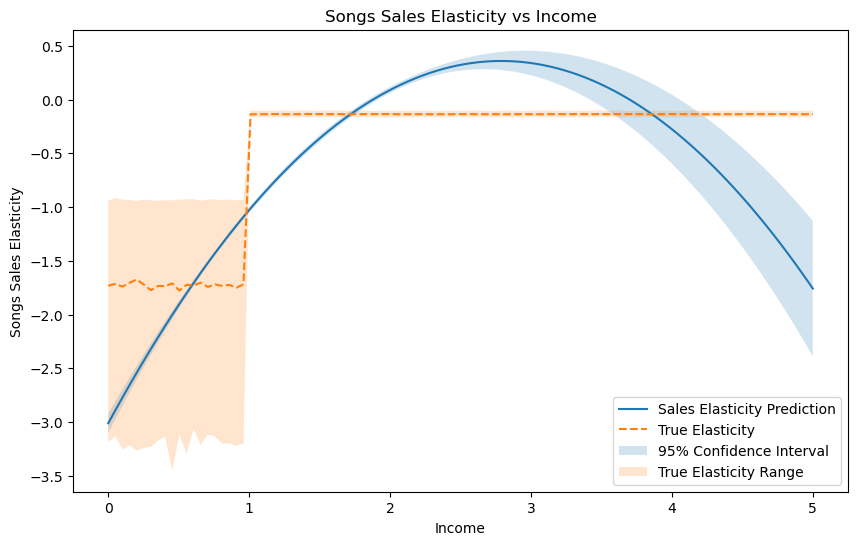

In [35]:
# Compare the estimate and the truth
plt.figure(figsize=(10, 6))
plt.plot(X_test.flatten(), te_pred, label="Sales Elasticity Prediction")
plt.plot(X_test.flatten(), truth_te_estimate, "--", label="True Elasticity")
plt.fill_between(
    X_test.flatten(),
    te_pred_interval[0].flatten(),
    te_pred_interval[1].flatten(),
    alpha=0.2,
    label="95% Confidence Interval",
)
plt.fill_between(
    X_test.flatten(),
    truth_te_lower,
    truth_te_upper,
    alpha=0.2,
    label="True Elasticity Range",
)
plt.xlabel("Income")
plt.ylabel("Songs Sales Elasticity")
plt.title("Songs Sales Elasticity vs Income")
plt.legend(loc="lower right")

From the plot above, it's clear to see that the true treatment effect is a **nonlinear** function of income, with elasticity around -1.75 when income is smaller than 1 and a small negative value when income is larger than 1. The model fits a quadratic treatment effect, which is not a great fit. But it still captures the overall trend: the elasticity is negative and people are less sensitive to the price change if they have higher income.

In [37]:
# Get the final coefficient and intercept summary
est_dw.summary(feature_names=["income"])

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
income,2.417,0.075,32.128,0.0,2.27,2.565
income^2,-0.433,0.026,-16.773,0.0,-0.484,-0.383
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,-3.012,0.046,-65.575,0.0,-3.102,-2.922


`LinearDML` estimator can also return the summary of the coefficients and intercept for the final model, including point estimates, p-values and confidence intervals. From the table above, we notice that $income$ has positive effect and ${income}^2$ has negative effect, and both of them are statistically significant.

## Nonparametric Heterogeneity
Since we already know the true treatment effect function is nonlinear, let us fit another model using `CausalForestDML`, which assumes a fully **nonparametric estimation of the treatment effect**.

In [40]:
# initiate an EconML cate estimator
est_nonparam = CausalForestDML(model_y=GradientBoostingRegressor(), model_t=GradientBoostingRegressor())
# fit through dowhy
est_nonparam_dw = est_nonparam.dowhy.fit(Y, T, X=X, W=W, outcome_names=["log_demand"], treatment_names=["log_price"],
                                         feature_names=["income"], confounder_names=confounder_names, inference="blb")

In [41]:
# Get treatment effect and its confidence interval
te_pred = est_nonparam_dw.effect(X_test).flatten()
te_pred_interval = est_nonparam_dw.effect_interval(X_test)

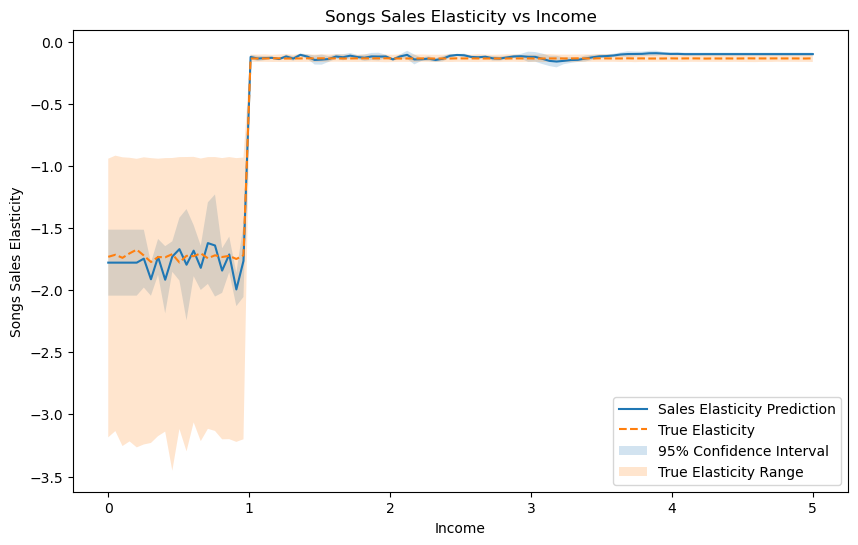

In [42]:
# Compare the estimate and the truth
plt.figure(figsize=(10, 6))
plt.plot(X_test.flatten(), te_pred, label="Sales Elasticity Prediction")
plt.plot(X_test.flatten(), truth_te_estimate, "--", label="True Elasticity")
plt.fill_between(
    X_test.flatten(),
    te_pred_interval[0].flatten(),
    te_pred_interval[1].flatten(),
    alpha=0.2,
    label="95% Confidence Interval",
)
plt.fill_between(
    X_test.flatten(),
    truth_te_lower,
    truth_te_upper,
    alpha=0.2,
    label="True Elasticity Range",
)
plt.xlabel("Income")
plt.ylabel("Songs Sales Elasticity")
plt.title("Songs Sales Elasticity vs Income")
plt.legend(loc="lower right")

We notice that this model fits much better than the `LinearDML`, the 95% confidence interval correctly covers the true treatment effect estimate and captures the variation when income is around 1. Overall, the model shows that people with low income are much more sensitive to the price changes than higher income people.

# Test Estimate Robustness

# Validating Causal Estimates

Estimating an effect is great, but we need to have confidence that it’s *causal*. We made an unconfoundedness assumption (that controlling for our W removes all bias). Let’s **challenge our findings with some robustness tests** using DoWhy’s refutation tools. We will perform a series of tests on the estimated effect (we’ll use the causal forest model’s result for these tests):

1. **Add a Random Common Cause** – We’ll introduce a fake confounder (a random noise variable) into the model and re-estimate the effect. Because this variable is pure noise, it should not actually change our estimated effect by much if our model is sound. If we saw a big change, it might mean our model was overfitting or found a coincidental correlation with that random variable. DoWhy’s `refute_estimate` method can add a random common cause and see what happens.

2. **Add an Unobserved Common Cause** – Here we simulate the presence of a hidden confounder. DoWhy will add a synthetic variable that affects both treatment and outcome with a certain strength and see how the estimated effect shifts. This helps gauge sensitivity: if a moderate hidden confounder could drastically change our effect, we should be more cautious. If even adding one doesn’t move the effect much, our results are robust. Essentially, we’re stress-testing the assumption of no hidden confounders.

3. **Placebo Treatment Test** – We replace the actual treatment with a randomly permuted version (or some noise) and re-estimate the “effect”. Since a random treatment has no real causal impact on outcome, the method should find no significant effect. If it does find something, we might be picking up spurious patterns. We expect the placebo effect estimate to be around zero.

4. **Subset Data Test** – We randomly remove a subset of the data (say 20% of users) and re-estimate the effect to see if the result is consistent. A robust causal estimate should not depend on having every specific data point; it should be similar even with some data removed (within statistical error). Large changes would indicate over-reliance on certain data points or potential overfitting.

A strong model should be insensitive to noise and generalize well.

### Add Random Common Cause <a id="random-common-cause"></a>

How robust are our estimates to adding another confounder? We use DoWhy to test this!

In [47]:
res_random = est_nonparam_dw.refute_estimate(method_name="random_common_cause", num_simulations=5)
print(res_random)

Refute: Add a random common cause
Estimated effect:-0.9549417937033431
New effect:-0.9575209196441588
p value:0.21522207134943527



### Add Unobserved Common Cause <a id="unobserved-common-cause"></a>

How robust are our estimates to unobserved confounders? Since we assume the model is under unconfoundedness, adding an unobserved confounder might bias the estimates. We use DoWhy to test this!

In [49]:
res_unobserved = est_nonparam_dw.refute_estimate(
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="linear",
    confounders_effect_on_outcome="linear",
    effect_strength_on_treatment=0.1,
    effect_strength_on_outcome=0.1,
)
print(res_unobserved)

Refute: Add an Unobserved Common Cause
Estimated effect:-0.9549417937033431
New effect:-1.0120539479522068



### Replace Treatment with a Random (Placebo) Variable <a id="placebo-variable"></a>

What happens our estimates if we replace the treatment variable with noise? Ideally, the average effect would be wildly different than our original estimate. We use DoWhy to investigate!

In [51]:
res_placebo = est_nonparam_dw.refute_estimate(
    method_name="placebo_treatment_refuter", placebo_type="permute",
    num_simulations=3
)
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:-0.9549417937033431
New effect:-0.0038306130551061107
p value:0.3802049855284596



### Remove a Random Subset of the Data <a id="subset"></a>

Do we recover similar estimates on subsets of the data? This speaks to the ability of our chosen estimator to generalize well. We use DoWhy to investigate this!

In [53]:
res_subset = est_nonparam_dw.refute_estimate(
    method_name="data_subset_refuter", subset_fraction=0.8,
    num_simulations=3)
print(res_subset)

Refute: Use a subset of data
Estimated effect:-0.9549417937033431
New effect:-0.9580427726008464
p value:1.2210551712077411e-05



# Interpreting Treatment Effects

We use `SingleTreeCateInterpreter` to fit a simple decision tree on estimated treatment effects. This helps understand **which features explain variation** in effect.

EconML includes interpretability tools to better understand treatment effects. Treatment effects can be complex, but oftentimes we are interested in simple rules that can differentiate between users who respond positively, users who remain neutral and users who respond negatively to the proposed changes.

The EconML `SingleTreeCateInterpreter` provides interperetability by training a single decision tree on the treatment effects outputted by the any of the EconML estimators. In the figure below we can see in dark red users respond strongly to the discount and the in white users respond lightly to the discount.

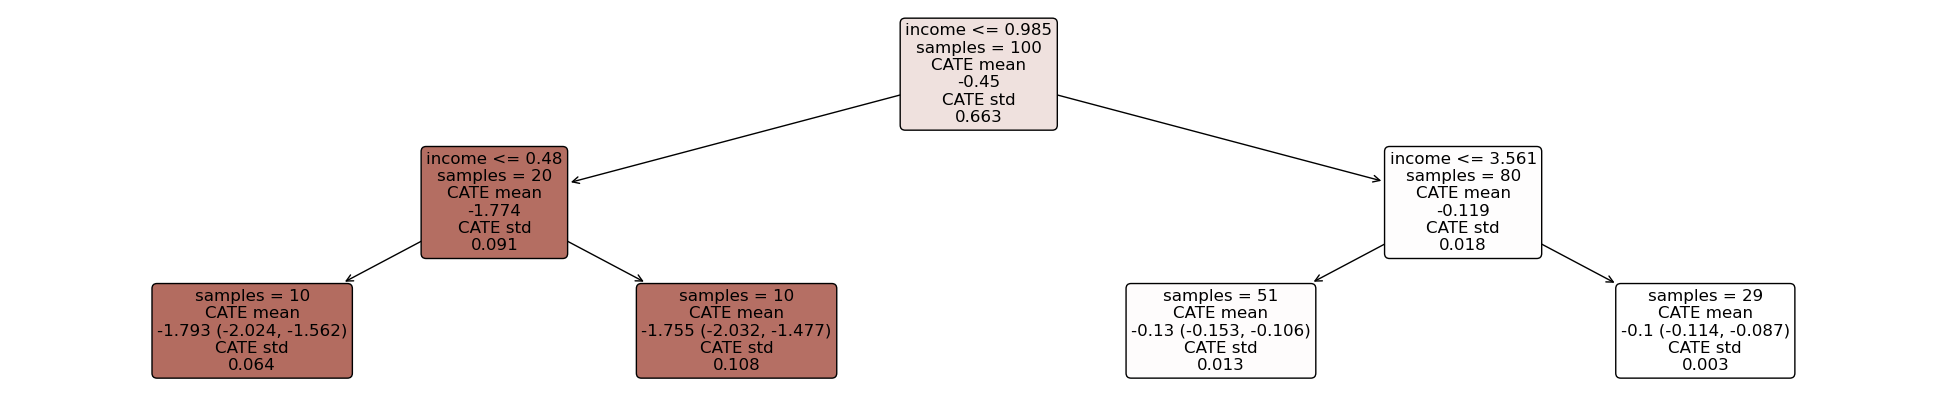

In [55]:
intrp = SingleTreeCateInterpreter(include_model_uncertainty=True, max_depth=2, min_samples_leaf=10)
intrp.interpret(est_nonparam_dw, X_test)
plt.figure(figsize=(25, 5))
intrp.plot(feature_names=["income"], fontsize=12)

# Make Policy Decision
We want to make policy decisions to maximum the **revenue** instead of the demand. In this scenario,


\begin{align}
Rev & = Y \cdot T \\
    & = \exp^{log(Y)} \cdot T\\
    & = \exp^{(\theta(X) \cdot log(T) + f(X,W) + \epsilon)} \cdot T \\
    & = \exp^{(f(X,W) + \epsilon)} \cdot T^{(\theta(X)+1)}
\end{align}


With the decrease of price, revenue will increase only if $\theta(X)+1<0$. Thus, we set `sample_treatment_costs=-1` here to learn **what kinds of customers we should give a small discount to maximum the revenue**.

The EconML library includes policy interpretability tools such as `SingleTreePolicyInterpreter` that take in a treatment cost and the treatment effects to learn simple rules about which customers to target profitably. In the figure below we can see the model recommends to give discount for people with income less than $0.985$ and give original price for the others.

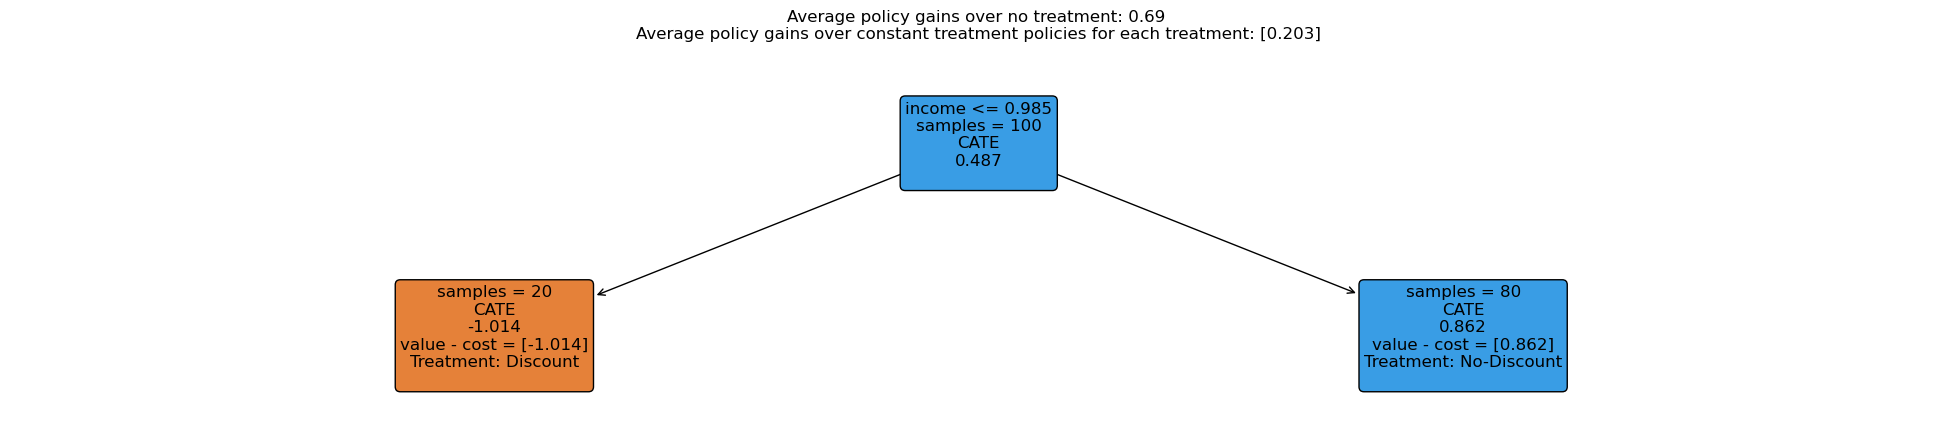

In [57]:
intrp = SingleTreePolicyInterpreter(risk_level=0.05, max_depth=2, min_samples_leaf=1, min_impurity_decrease=0.001)
intrp.interpret(est_nonparam_dw, X_test, sample_treatment_costs=-1)
plt.figure(figsize=(25, 5))
intrp.plot(feature_names=["income"], treatment_names=["Discount", "No-Discount"], fontsize=12)

Now, let us compare our policy with other baseline policies! Our model says which customers to give a small discount to, and for this experiment, we will set a discount level of 10% for those users. Because the model is misspecified we would not expect good results with large discounts. Here, because we know the ground truth, we can evaluate the value of this policy.

In [59]:
# define function to compute revenue
def revenue_fn(data, discount_level1, discount_level2, baseline_T, policy):
    policy_price = baseline_T * (1 - discount_level1) * policy + baseline_T * (1 - discount_level2) * (1 - policy)
    demand = demand_fn(data, policy_price)
    rev = demand * policy_price
    return rev

In [60]:
policy_dic = {}
# our policy above
policy = intrp.treat(X)
policy_dic["Our Policy"] = np.mean(revenue_fn(train_data, 0, 0.1, 1, policy))

## previous strategy
policy_dic["Previous Strategy"] = np.mean(train_data["price"] * train_data["demand"])

## give everyone discount
policy_dic["Give Everyone Discount"] = np.mean(revenue_fn(train_data, 0.1, 0, 1, np.ones(len(X))))

## don't give discount
policy_dic["Give No One Discount"] = np.mean(revenue_fn(train_data, 0, 0.1, 1, np.ones(len(X))))

## follow our policy, but give -10% discount for the group doesn't recommend to give discount
policy_dic["Our Policy + Give Negative Discount for No-Discount Group"] = np.mean(revenue_fn(train_data,
                                                                                             -0.1, 0.1, 1, policy))

## give everyone -10% discount
policy_dic["Give Everyone Negative Discount"] = np.mean(revenue_fn(train_data, -0.1, 0, 1, np.ones(len(X))))

In [61]:
# get policy summary table
res = pd.DataFrame.from_dict(policy_dic, orient="index", columns=["Revenue"])
res["Rank"] = res["Revenue"].rank(ascending=False)
res

,Revenue,Rank
Our Policy,14.686241,2.0
Previous Strategy,14.349342,4.0
Give Everyone Discount,13.774469,6.0
Give No One Discount,14.294606,5.0
Our Policy + Give Negative Discount for No-Discount Group,15.564411,1.0
Give Everyone Negative Discount,14.612670,3.0


These are illustrative, but they show a pattern: Giving a discount to everyone (even those who don’t need it) hurts revenue the most, as expected – you lose money on each sale for people who would have bought anyway. Never discounting at all is okay, but the previous tailored strategy or our new policy do better. **Our targeted policy significantly outperforms both the “all discount” and “no discount” extremes, as well as the company’s original strategy**. It captures additional revenue.

In fact, the theoretical scenario of also raising the price for high-income (charging them 10% extra) does best of all – which implies that maybe the base price was a bit low relative to what high-income would pay. That scenario gave a revenue of 15.56, which is higher than our policy’s 14.69. However, implementing a price increase for some users might not have been considered initially. It does suggest that there is room to optimize further: if high-income users are so insensitive, perhaps the company could even try a slight price increase for them. But that goes beyond the original experiment scope.

The key result is: **Our causal segmentation policy beat all baseline policies tested.** In numbers, if baseline was ~14.3, we got ~14.7 with targeting – a nice uplift. This means more profit by focusing discounts where they matter most.

To state plainly: *By giving discounts only to the low-income segment (who respond strongly), the company earns more revenue than giving no discounts or blanket discounts.* We effectively **avoided needless revenue cuts** on high-income users who would have bought anyway, and we still got the boost from low-income users buying more due to the discount.

Our analysis demonstrates how causal inference can directly inform policy: we identified the right segment and verified the uplift in a policy simulation.

*(At this point, we would present perhaps a small table of the average Revenue under each strategy to the audience, highlighting that our policy is near-optimal. The one scenario that beat it requires increasing prices for others, which the company could consider as a separate decision.)*

To summarize the policy results in words: **We beat the baseline policies!** Our targeted discount policy yields higher revenue than the company’s previous strategy, than always discounting, and than never discounting. The only scenario that did better was one where we actually charged the non-discount group even more, implying our current base price might be on the lower side. But the critical win is that *smart segmentation pays off.* We used the same total “discount budget” more efficiently – only where it counts.

Finally, comparing these strategies side by side not only validates our model’s insight, but also shows decision-makers the tangible benefit. This is causal analysis coming full circle: from data to decision.

Finally, we compare different pricing policies to see which generates the highest revenue. This demonstrates how our causal insights translate into actionable business decisions.

## Conclusion  
In this notebook, we explored how careful data preparation and modern causal inference techniques enable us to estimate **individualized treatment effects** and make smarter business decisions. Instead of treating all customers the same, we found how to **personalize a pricing strategy**:

- **Proper data preparation is crucial**: We began by identifying our outcome, treatment, and potential confounders. We transformed variables (like taking logs) to satisfy model assumptions and made sure to control for important factors (previous behavior, demographics) to mitigate bias.

- **Causal inference libraries (DoWhy, EconML) are powerful**: They allowed us to combine rigorous causal logic (through DoWhy’s identification and refutation) with flexible machine learning models (through EconML’s DML and causal forest). This combination gave us a robust estimate of how treatment effects vary across customers, something classical techniques struggle with.

- **Testing assumptions strengthens trust**: We didn’t just take the model at face value; we performed refutation tests (adding random confounders, placebo tests, etc.). These tests increased our confidence that the effect we found (discount elasticity by income) is real and not due to hidden biases or random chance.

- **Interpretability tools yield actionable insights**: The raw output of a complex causal model can be hard to interpret. By using a SingleTreeCateInterpreter, we translated the findings into a simple decision rule (split by income level) that any stakeholder can understand. We discovered a clear rule: *target low-income customers for discounts*.

- **Policy evaluation is key**: We simulated different pricing policies (targeted vs blanket vs none) to compare expected revenues. This step bridged the gap between statistical estimates and real-world impact. It showed that the policy informed by our causal model would indeed outperform others, thus giving decision-makers evidence to implement it.

By applying these causal inference techniques, businesses can move beyond just predicting outcomes to **understanding the causal impact** of their actions on different customer segments. In our example, instead of asking “which customers bought more during the sale?” we answered “which customers bought more *because of* the discount?”. This causal knowledge lets the company target discounts efficiently, allocate resources where they yield the highest return, and avoid wasteful spending on customers who won’t respond. 

The end result: a more **targeted, data-driven strategy** that maximizes profit and impact. This crash course demonstrated the workflow – from formulating a causal question, preparing data, using specialized libraries to estimate and validate effects, through to interpreting and applying the results. Armed with these tools and methods, you can tackle a wide range of “what-if” scenarios in business and confidently design policies that are not just correlation-driven, but causally sound.

# References & License

**References**

The following sources were referenced in this study:

1. https://econml.azurewebsites.net/spec/causal_intro.html
2. https://www.carelonresearch.com/perspectives/what-is-causal-inference-and-when-do-you-need-it
3. https://www.pywhy.org/dowhy/v0.12/user_guide/foreword.html#the-need-for-causal-inference
4. https://medium.com/data-science-at-microsoft/causal-analysis-overview-causal-inference-versus-experimentation-versus-causal-discovery-d7c4ca99e3e4
---

**License**

This project is licensed under the **MIT License**:

```
MIT License

Copyright (c) 2025 Viswanath Raju Indukuri

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```